In [1]:
import pandas as pd
import numpy as np
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open("association-rules-20m.pickle", "rb") as fp:
    rules = pickle.load(fp)
    
rules['consequents_length'] = rules['consequents'].apply(lambda x: len(x))
rules['antecedents_length'] = rules['antecedents'].apply(lambda x: len(x))
filtered_rules = rules[(rules['support'] > 0.05) &
      (rules['confidence'] > 0.3) & (rules['antecedents_length'] < 4) & (rules['consequents_length'] == 1)]
print(filtered_rules)

               antecedents consequents  antecedent support  \
3                   (4226)        (50)            0.059952   
5                   (6016)        (50)            0.086748   
6                    (111)       (858)            0.073599   
7                   (1196)       (260)            0.124916   
8                   (1198)       (260)            0.082372   
...                    ...         ...                 ...   
22437   (5952, 4993, 7502)      (7153)            0.065520   
22438   (7153, 4993, 7502)      (5952)            0.064595   
22506  (5952, 7153, 58559)      (4993)            0.075787   
22507  (5952, 4993, 58559)      (7153)            0.064617   
22508  (7153, 4993, 58559)      (5952)            0.064133   

       consequent support   support  confidence      lift  leverage  \
3                0.380120  0.054797    0.914007  2.404520  0.032008   
5                0.380120  0.071202    0.820792  2.159296  0.038227   
6                0.395161  0.059830    0.8

In [38]:
movies_map = {}
movies_df = pd.read_csv("../data/ml-20m/movies.csv", dtype={
                               'movieId': int,
                               'title': str,
                               'genres': str,
                             })
for index, row in movies_df.iterrows():
    movies_map[row['movieId']] = row['title']

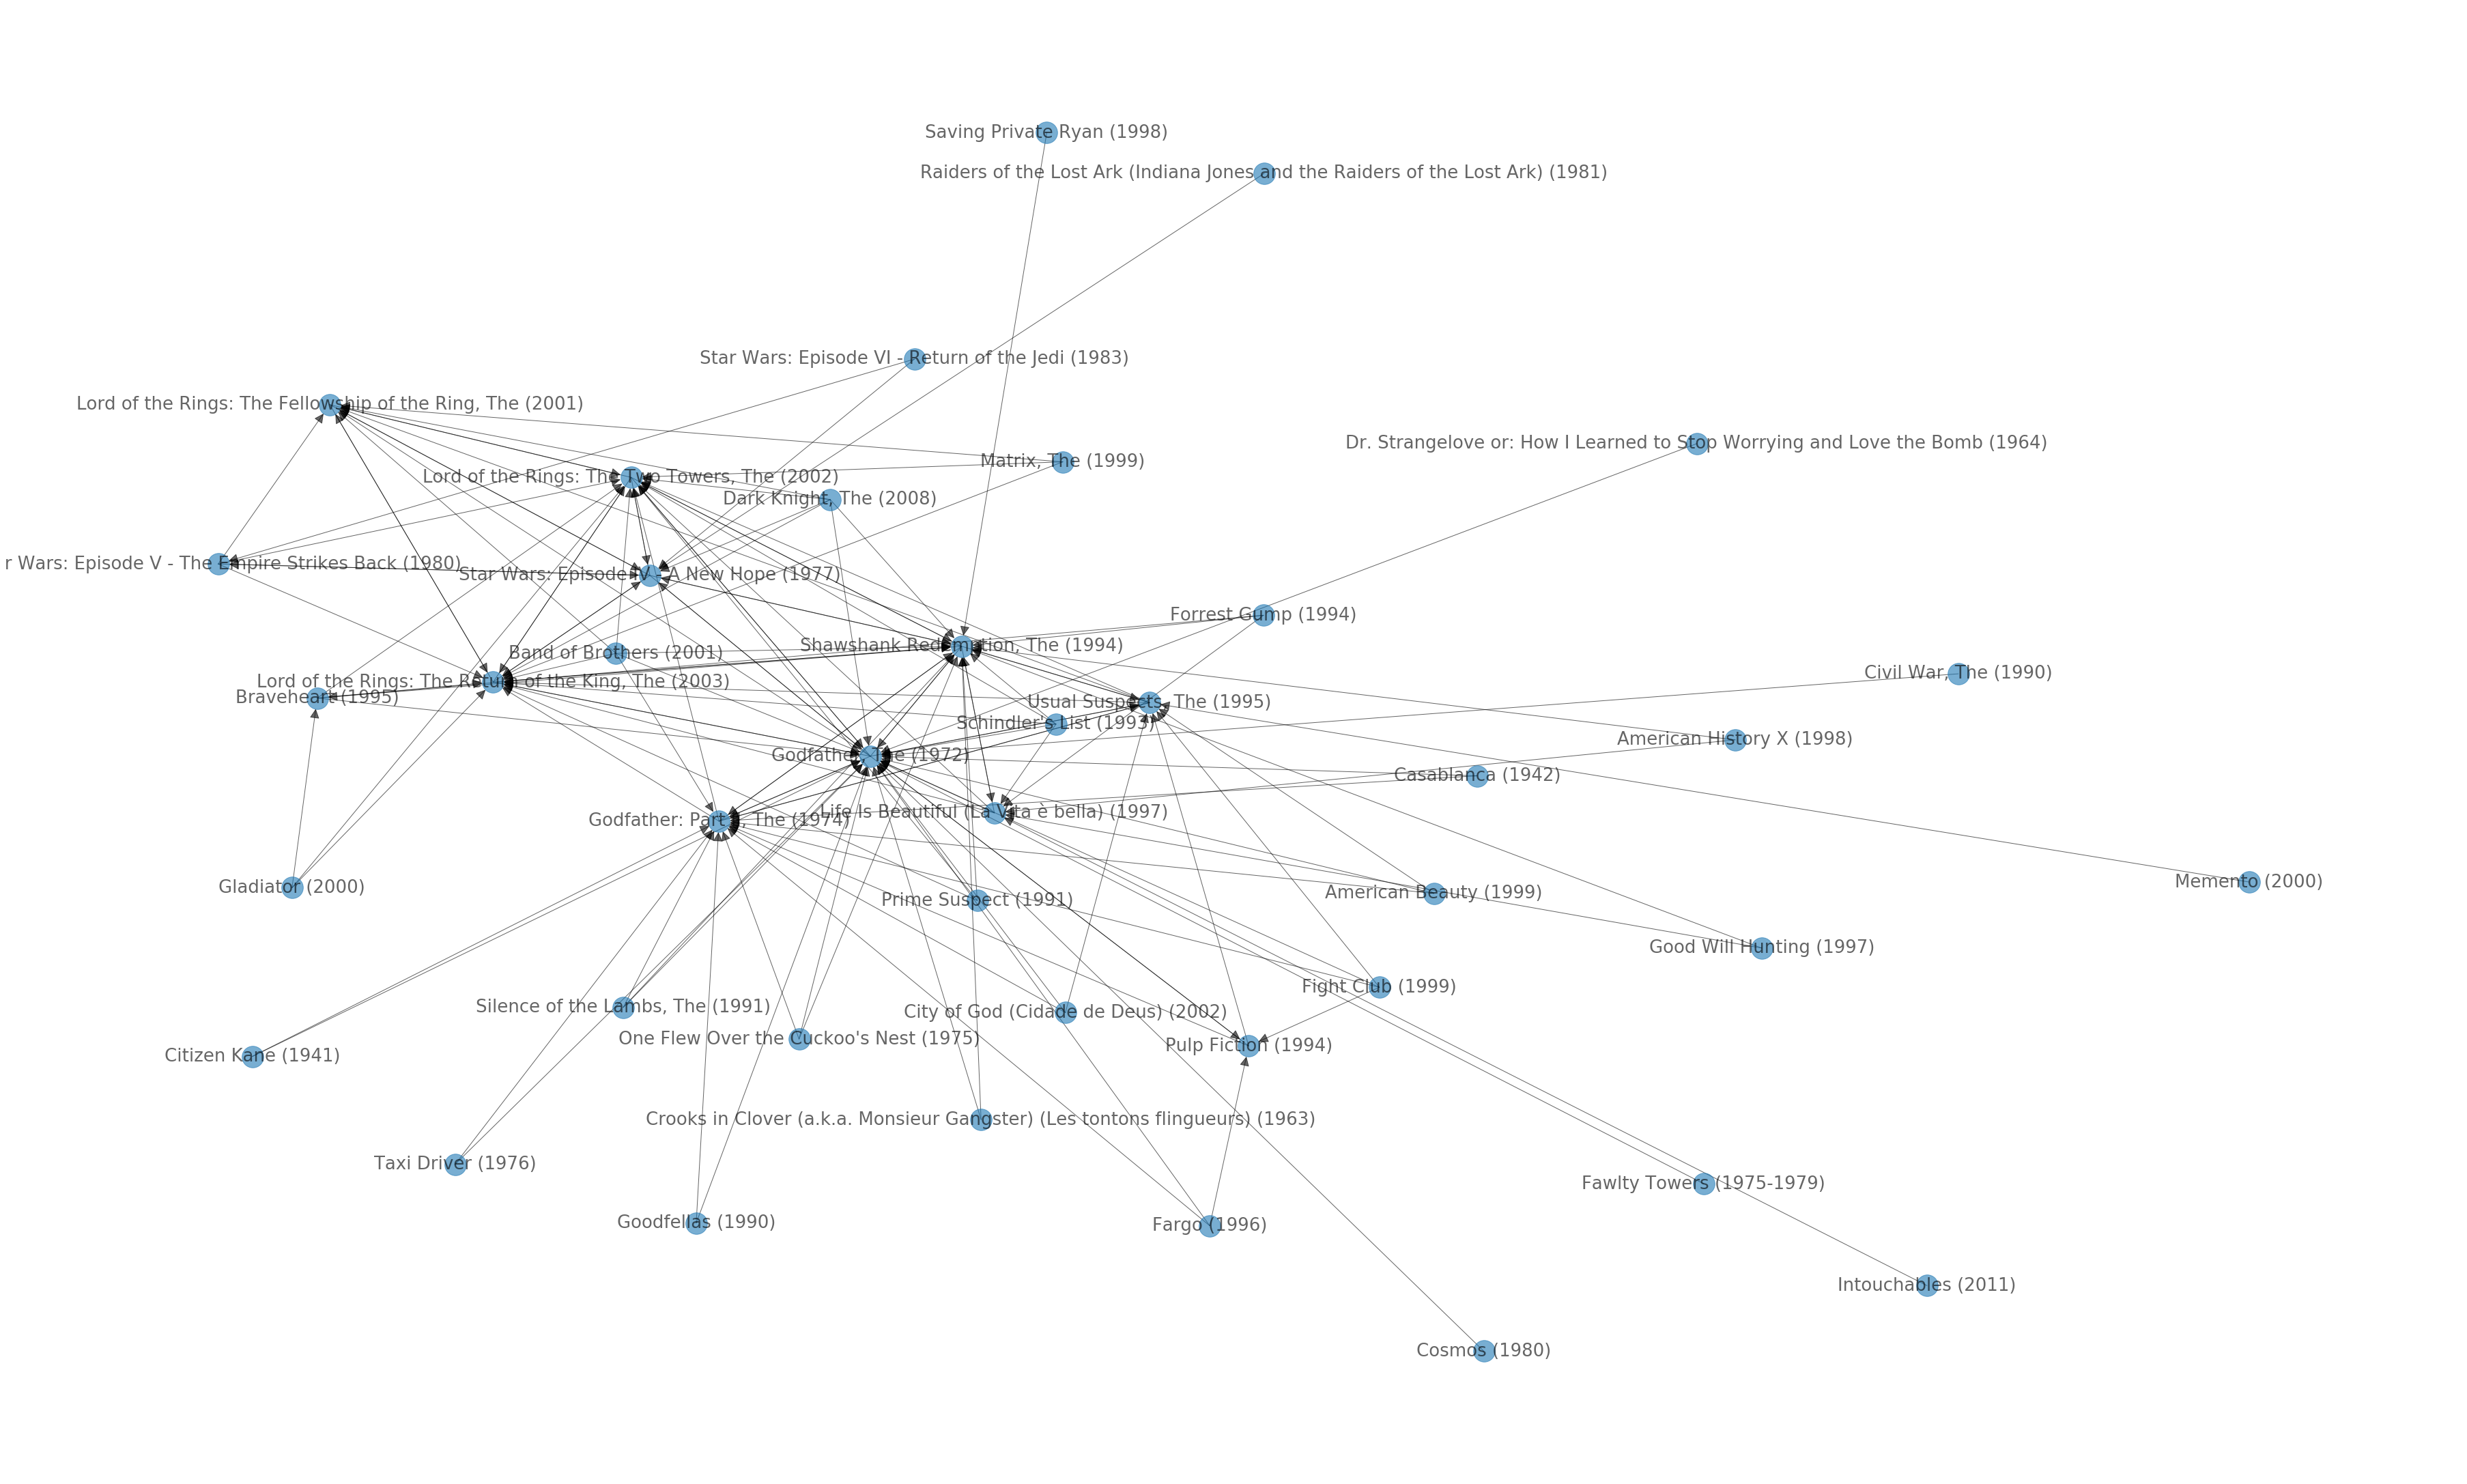

In [43]:
fig = plt.figure(figsize=(50,30))

edge_from = []
edge_to = []
for index, row in filtered_rules.iterrows():
    for source in enumerate(list(row['antecedents'])):
        if list(row['consequents'])[0] != 745: # Filter out unconnected one
            edge_from.append(movies_map[source[1]])
            edge_to.append(movies_map[list(row['consequents'])[0]])

edges_df = pd.DataFrame({ 'from':edge_from, 'to':edge_to})
edges_df

# Build your graph
graph = nx.convert_matrix.from_pandas_edgelist(edges_df, 'from', 'to', create_using=nx.DiGraph())
 
# Plot it
nx.draw(graph, with_labels=True, node_size=1000, alpha=0.6, font_size=26, pos=nx.spring_layout(graph), arrowsize=30)
plt.show()
fig.savefig('association_rules.png')